In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt


In [9]:
columns = [
    "age","workclass","fnlwgt","education","education_num",
    "marital_status","occupation","relationship","race","sex",
    "capital_gain","capital_loss","hours_per_week",
    "native_country","income"
]
df = pd.read_csv(
    "data/raw.csv",
    names=columns,
    skipinitialspace=True
)

df.replace("?", pd.NA, inplace=True)


df.insert(0, "id", range(1, len(df) + 1))


df.to_csv("data/raw.csv", index=False)

print("Modified CSV created successfully!")

Modified CSV created successfully!


In [10]:
df.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,3,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,4,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,5,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [13]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
df.shape

(30163, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30163 entries, 0 to 32561
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              30163 non-null  int64 
 1   age             30163 non-null  int64 
 2   workclass       30163 non-null  object
 3   fnlwgt          30163 non-null  int64 
 4   education       30163 non-null  object
 5   education_num   30163 non-null  int64 
 6   marital_status  30163 non-null  object
 7   occupation      30163 non-null  object
 8   relationship    30163 non-null  object
 9   race            30163 non-null  object
 10  sex             30163 non-null  object
 11  capital_gain    30163 non-null  int64 
 12  capital_loss    30163 non-null  int64 
 13  hours_per_week  30163 non-null  int64 
 14  native_country  30163 non-null  object
 15  income          30163 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


In [20]:
df.nunique()

id                30163
age                  72
workclass             7
fnlwgt            20263
education            16
education_num        16
marital_status        7
occupation           14
relationship          6
race                  5
sex                   2
capital_gain        118
capital_loss         90
hours_per_week       94
native_country       41
income                2
dtype: int64

In [21]:

df.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30163.000000,30163.000000,3.016300e+04,30163.000000,30163.000000,30163.000000,30163.000000
mean,16288.563240,38.437921,1.897901e+05,10.121407,1092.043729,88.369559,40.931207
std,9383.714801,13.134447,1.056532e+05,2.550007,7406.226340,404.291989,11.979787
min,1.000000,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,8179.500000,28.000000,1.176225e+05,9.000000,0.000000,0.000000,40.000000
50%,16287.000000,37.000000,1.784210e+05,10.000000,0.000000,0.000000,40.000000
75%,24403.500000,47.000000,2.376270e+05,13.000000,0.000000,0.000000,45.000000
max,32562.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
print("Categories in 'workclass' variable:",end=" " )
print(df['workclass'].unique())

print("Categories in 'education' variable:",end=" ")
print(df['education'].unique())

print("Categories in'marital_status' variable:",end=" " )
print(df['marital_status'].unique())

print("Categories in 'occupation' variable:",end=" " )
print(df['occupation'].unique())

print("Categories in 'relationship' variable:",end=" " )
print(df['relationship'].unique())

print("Categories in 'race' variable:",end=" " )
print(df['race'].unique())
print("Categories in 'sex' variable:",end=" " )
print(df['sex'].unique())
print("Categories in 'native_country' variable:",end=" " )
print(df['native_country'].unique())
print("Categories in 'income' variable:",end=" " )
print(df['income'].unique())

Categories in 'workclass' variable: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
Categories in 'education' variable: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
Categories in'marital_status' variable: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
Categories in 'occupation' variable: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
Categories in 'relationship' variable: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
Categories in 'race' variable: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
Categories in

In [27]:

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

We have 9 categorical features : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [28]:
df.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,3,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,4,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,5,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [29]:
df_eda = df.drop(columns=["id", "fnlwgt"])

In [30]:
df_eda["income"] = df_eda["income"].map({"<=50K": 0, ">50K": 1})

In [31]:
df_eda["age_group"] = pd.cut(
    df_eda["age"],
    bins=[0, 25, 35, 50, 100],
    labels=["Young", "Early-Career", "Mid-Career", "Senior"]
)

In [32]:
df_eda["has_capital_gain"] = (df_eda["capital_gain"] > 0).astype(int)
df_eda["has_capital_loss"] = (df_eda["capital_loss"] > 0).astype(int)

In [33]:
df_eda["work_intensity"] = pd.cut(
    df_eda["hours_per_week"],
    bins=[0, 25, 40, 60, 100],
    labels=["Part-time", "Full-time", "Overtime", "Extreme"]
)

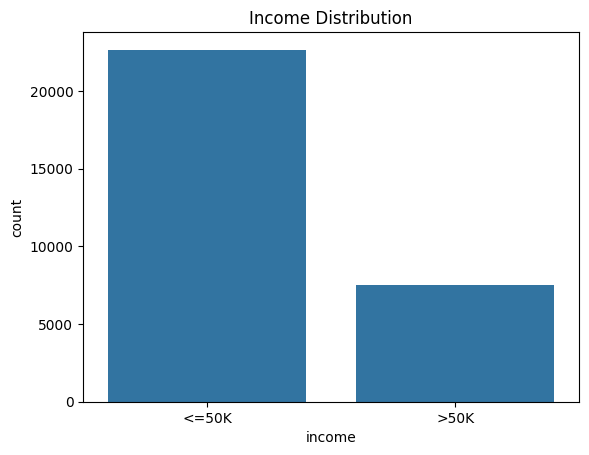

In [34]:
sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()

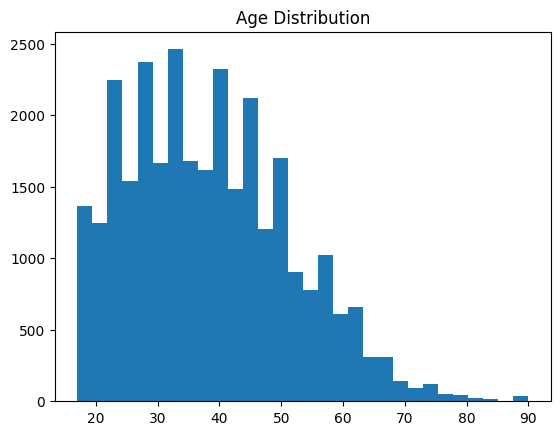

In [35]:
plt.hist(df["age"], bins=30)
plt.title("Age Distribution")
plt.show()

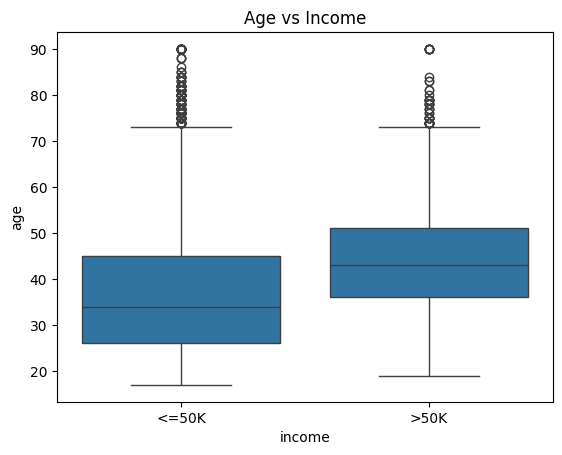

In [36]:
sns.boxplot(x="income", y="age", data=df)
plt.title("Age vs Income")
plt.show()

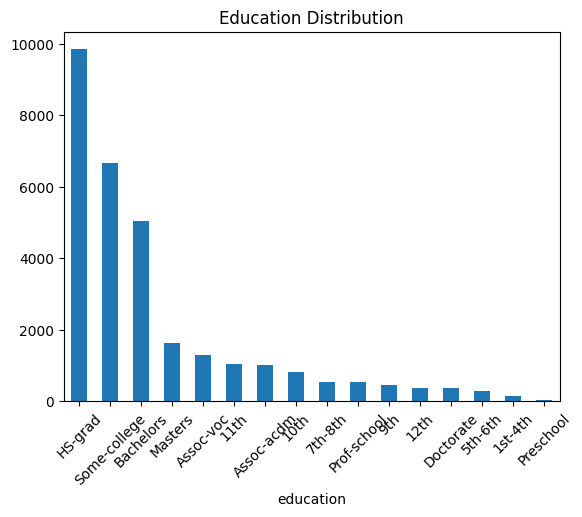

In [37]:
df["education"].value_counts().plot(kind="bar")
plt.title("Education Distribution")
plt.xticks(rotation=45)
plt.show()

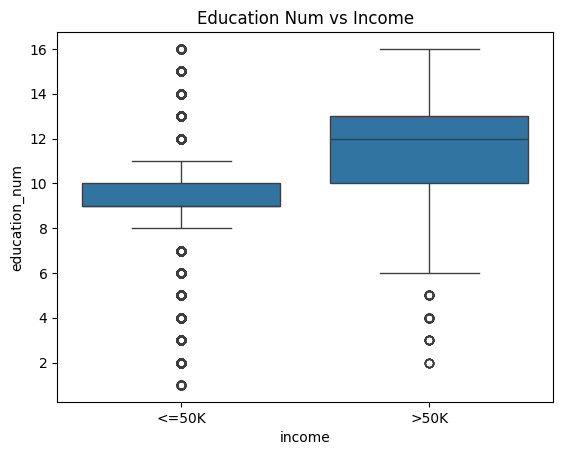

In [38]:
sns.boxplot(x="income", y="education_num", data=df)
plt.title("Education Num vs Income")
plt.show()

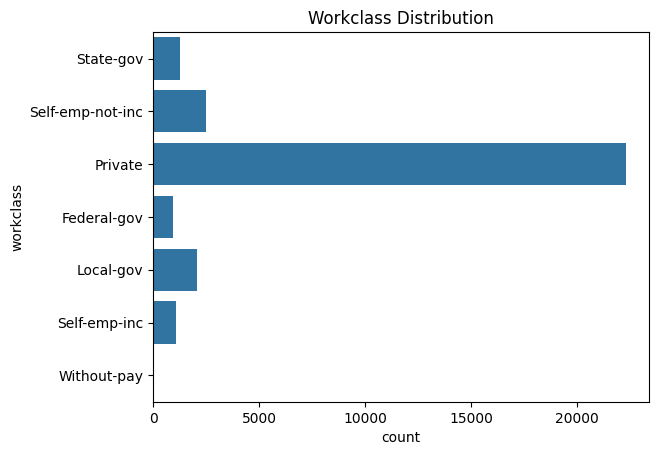

In [39]:
sns.countplot(y="workclass", data=df)
plt.title("Workclass Distribution")
plt.show()

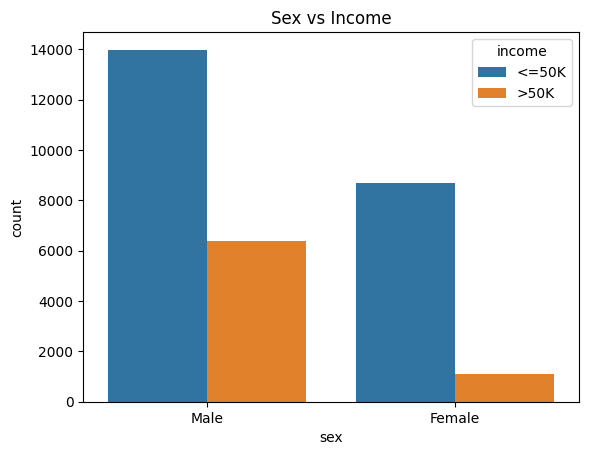

In [40]:
sns.countplot(x="sex", hue="income", data=df)
plt.title("Sex vs Income")
plt.show()

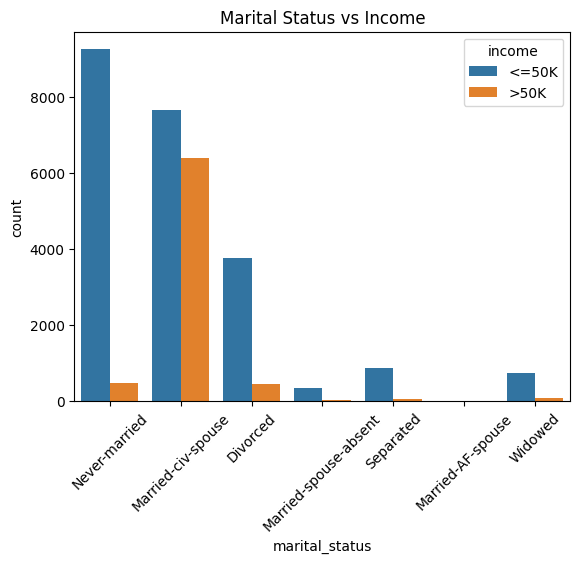

In [41]:
sns.countplot(x="marital_status", hue="income", data=df)
plt.xticks(rotation=45)
plt.title("Marital Status vs Income")
plt.show()

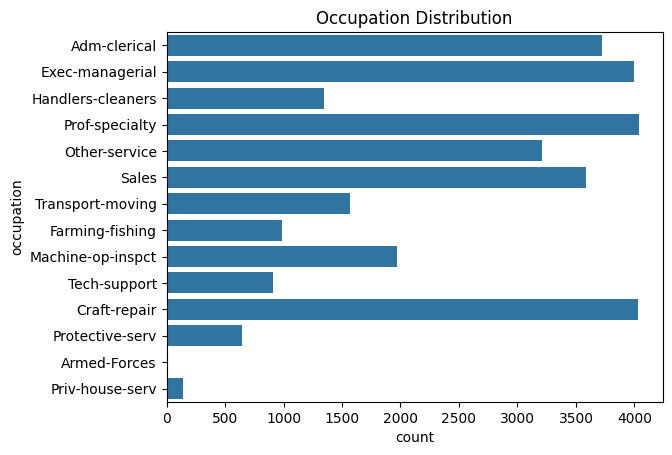

In [42]:
sns.countplot(y="occupation", data=df)
plt.title("Occupation Distribution")
plt.show()

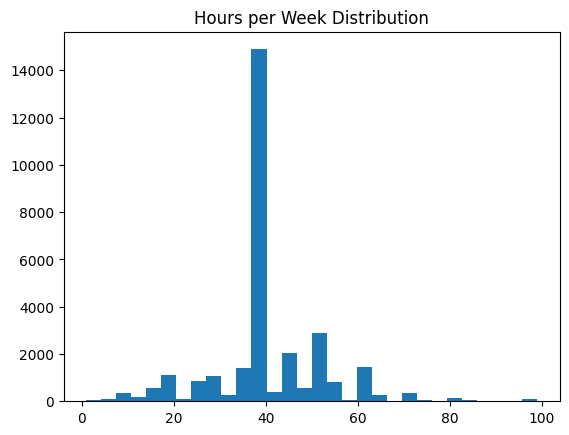

In [43]:
plt.hist(df["hours_per_week"], bins=30)
plt.title("Hours per Week Distribution")
plt.show()

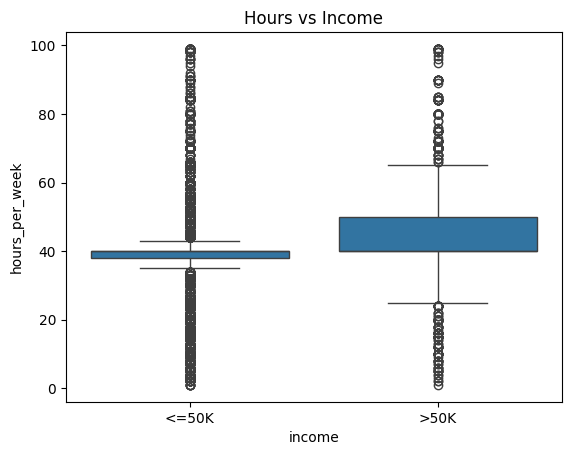

In [44]:
sns.boxplot(x="income", y="hours_per_week", data=df)
plt.title("Hours vs Income")
plt.show()

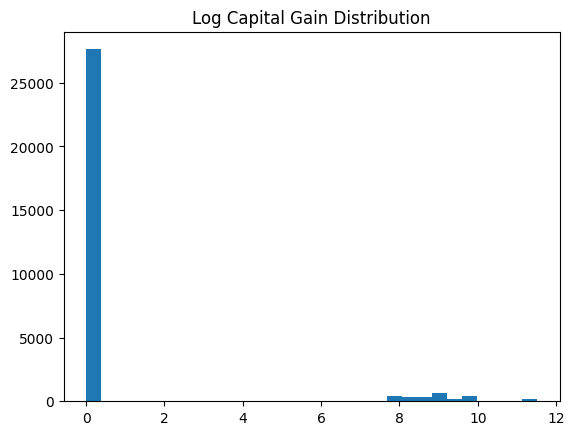

In [45]:
plt.hist(np.log1p(df["capital_gain"]), bins=30)
plt.title("Log Capital Gain Distribution")
plt.show()

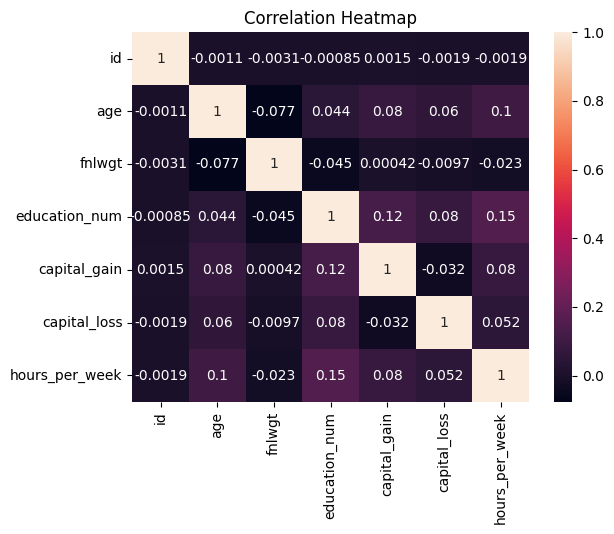

In [46]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

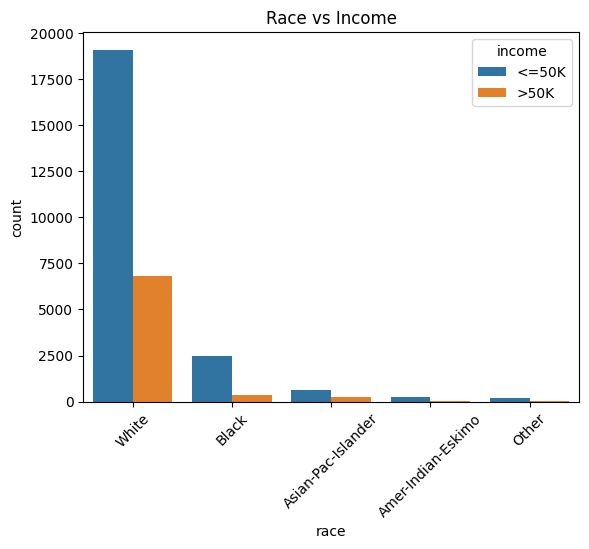

In [47]:
sns.countplot(x="race", hue="income", data=df)
plt.xticks(rotation=45)
plt.title("Race vs Income")
plt.show()

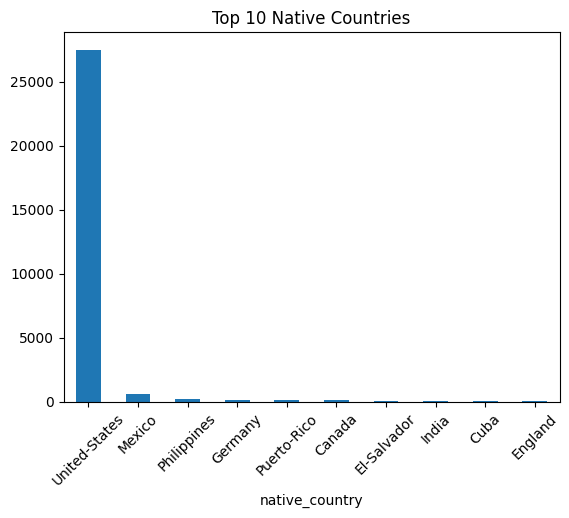

In [48]:
df["native_country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Native Countries")
plt.xticks(rotation=45)
plt.show()